So, we've beat image transformations to death. NOW we can start CV.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

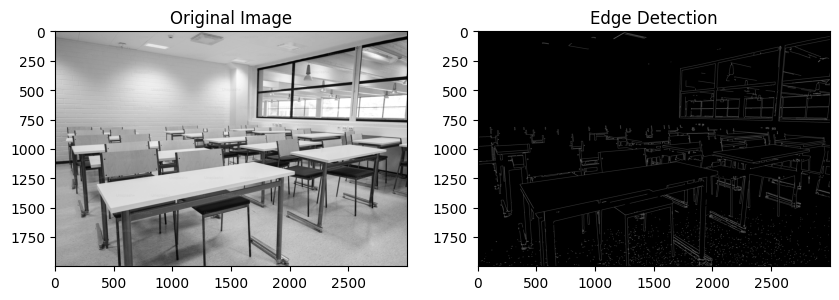

In [2]:
# Load the image
image = cv2.imread('classroom2.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(image, 100, 200)

# Display the original image and the edge-detected image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')

plt.show()

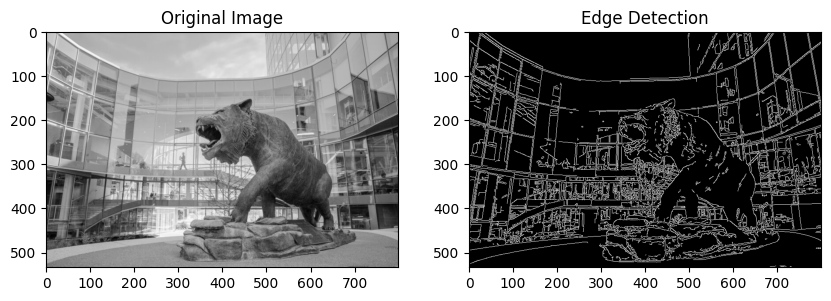

In [3]:
# Load the image
image = cv2.imread('RIT-2.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(image, 100, 200)

# Display the original image and the edge-detected image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')

plt.show()

Now let's look at some more complicated images

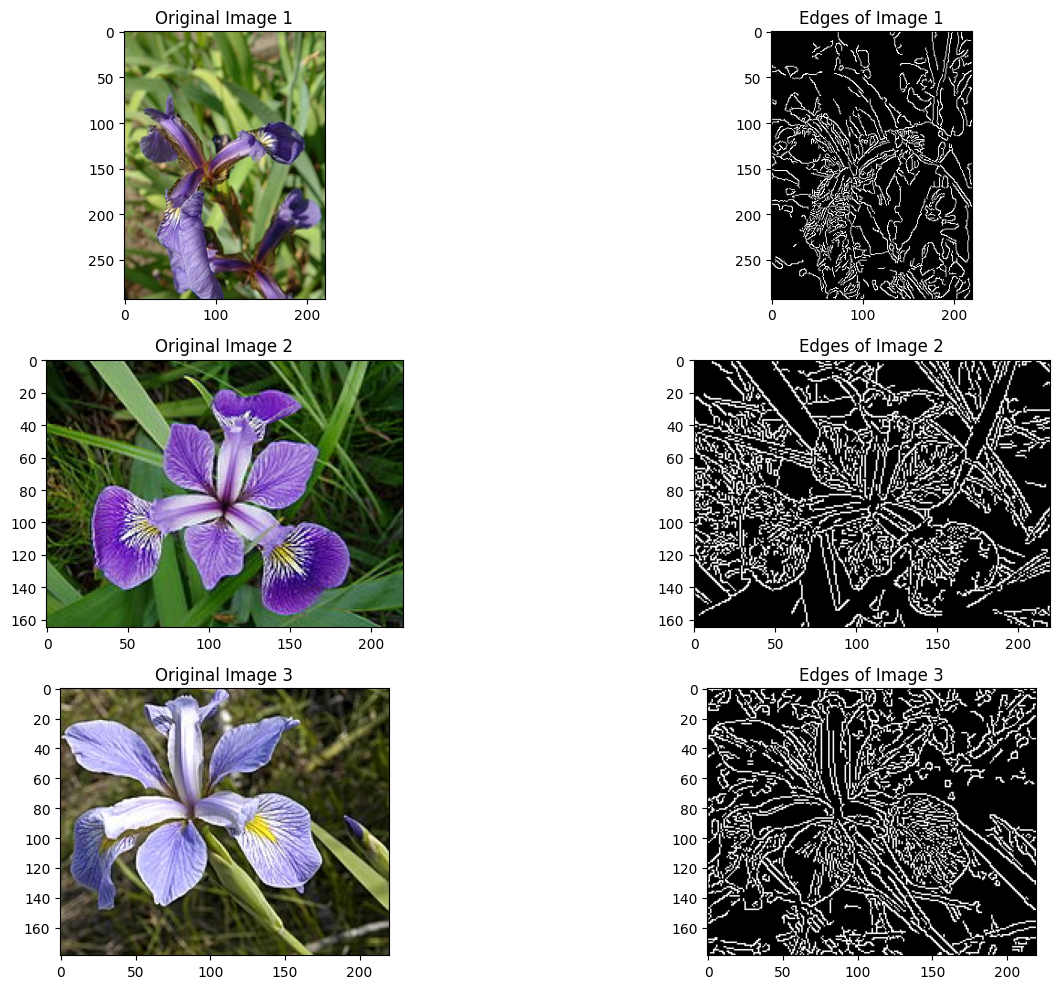

In [4]:
# Load three images
image1 = cv2.imread('iris_1.jpg')
image2 = cv2.imread('iris_2.jpg')
image3 = cv2.imread('iris_3.jpg')

# Convert the images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
gray_image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection to each image
edges1 = cv2.Canny(gray_image1, 100, 200)
edges2 = cv2.Canny(gray_image2, 100, 200)
edges3 = cv2.Canny(gray_image3, 100, 200)

# Create a figure to display all images
plt.figure(figsize=(15, 10))

# Display original and edge-detected images for image1
plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Original Image 1')

plt.subplot(3, 2, 2)
plt.imshow(edges1, cmap='gray')
plt.title('Edges of Image 1')

# Display original and edge-detected images for image2
plt.subplot(3, 2, 3)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Original Image 2')

plt.subplot(3, 2, 4)
plt.imshow(edges2, cmap='gray')
plt.title('Edges of Image 2')

# Display original and edge-detected images for image3
plt.subplot(3, 2, 5)
plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.title('Original Image 3')

plt.subplot(3, 2, 6)
plt.imshow(edges3, cmap='gray')
plt.title('Edges of Image 3')

# Show the plots
plt.tight_layout()
plt.show()


Welp, that looks terrible. Now what?

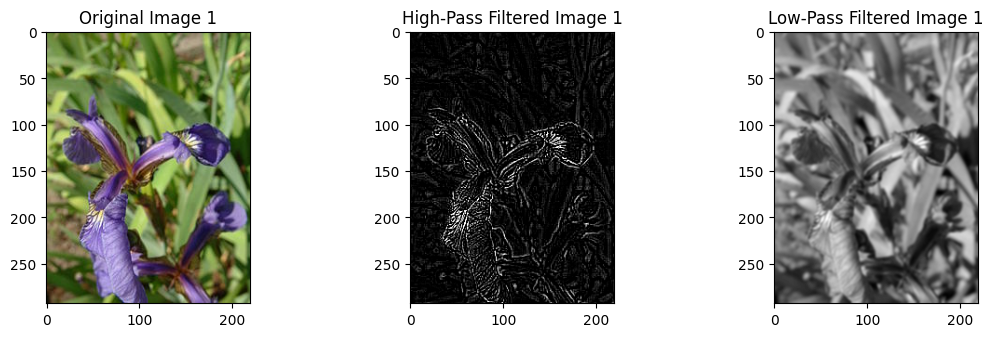

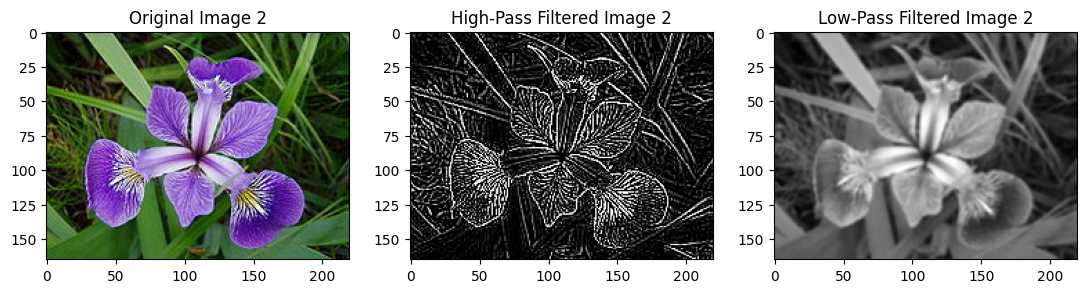

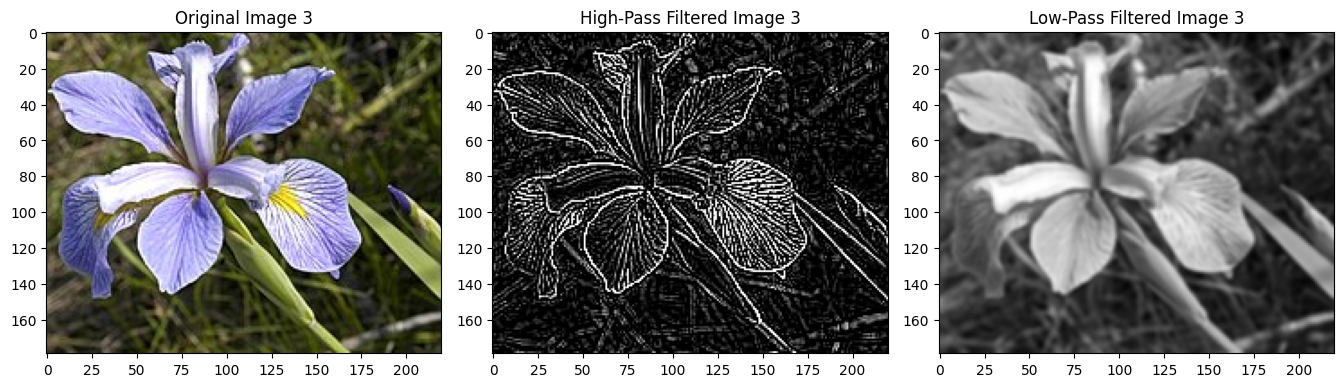

In [5]:
# Load three images
image1 = cv2.imread('iris_1.jpg')
image2 = cv2.imread('iris_2.jpg')
image3 = cv2.imread('iris_3.jpg')

# Convert the images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
gray_image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection to each image
edges1 = cv2.Canny(gray_image1, 100, 200)
edges2 = cv2.Canny(gray_image2, 100, 200)
edges3 = cv2.Canny(gray_image3, 100, 200)

# Low-pass filter (Gaussian blur) kernel size 5x5
low_pass_image1 = cv2.GaussianBlur(gray_image1, (5, 5), 0)
low_pass_image2 = cv2.GaussianBlur(gray_image2, (5, 5), 0)
low_pass_image3 = cv2.GaussianBlur(gray_image3, (5, 5), 0)

# High-pass filter kernel
high_pass_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])

# Apply high-pass filter using convolution
high_pass_image1 = cv2.filter2D(gray_image1, -1, high_pass_kernel)
high_pass_image2 = cv2.filter2D(gray_image2, -1, high_pass_kernel)
high_pass_image3 = cv2.filter2D(gray_image3, -1, high_pass_kernel)

# Apply Canny edge detection to each high-pass filtered image
high_edges1 = cv2.Canny(gray_image1, 100, 200)
high_edges2 = cv2.Canny(gray_image2, 100, 200)
high_edges3 = cv2.Canny(gray_image3, 100, 200)

# Apply Canny edge detection to each low-pass filtered image
low_edges1 = cv2.Canny(low_pass_image1, 100, 200)
low_edges2 = cv2.Canny(low_pass_image2, 100, 200)
low_edges3 = cv2.Canny(low_pass_image3, 100, 200)

# Create a figure to display all images
plt.figure(figsize=(18, 12))

# For image 1: Original, Edges, Low-pass, High-pass
plt.subplot(3, 4, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Original Image 1')

plt.subplot(3, 4, 2)
plt.imshow(high_pass_image1, cmap='gray')
plt.title('High-Pass Filtered Image 1')

plt.subplot(3, 4, 3)
plt.imshow(low_pass_image1, cmap='gray')
plt.title('Low-Pass Filtered Image 1')

plt.figure(figsize=(18, 12))
plt.subplot(3, 4, 1)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Original Image 2')

plt.subplot(3, 4, 2)
plt.imshow(high_pass_image2, cmap='gray')
plt.title('High-Pass Filtered Image 2')

plt.subplot(3, 4, 3)
plt.imshow(low_pass_image2, cmap='gray')
plt.title('Low-Pass Filtered Image 2')

plt.figure(figsize=(18, 12))
plt.subplot(3, 4, 1)
plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.title('Original Image 3')

plt.subplot(3, 4, 2)
plt.imshow(high_pass_image3, cmap='gray')
plt.title('High-Pass Filtered Image 3')

plt.subplot(3, 4, 3)
plt.imshow(low_pass_image3, cmap='gray')
plt.title('Low-Pass Filtered Image 3')

# Show the plot with all results
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Edges of the Low-Pass Filtered Image 3')

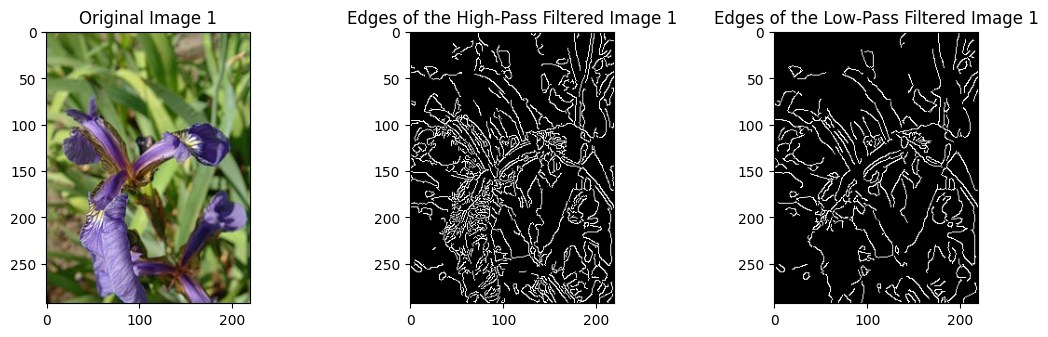

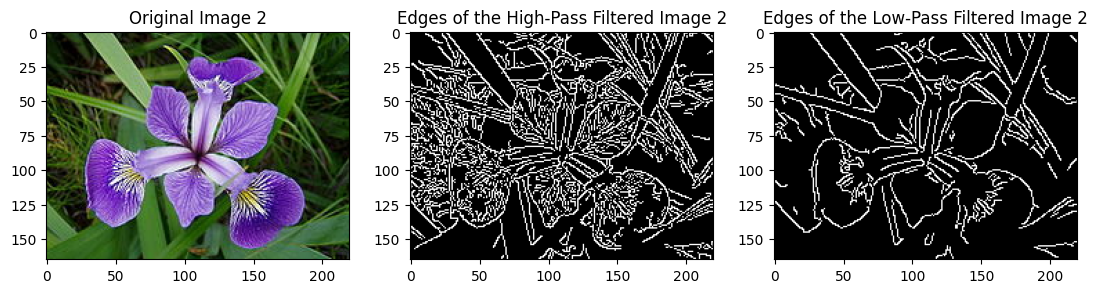

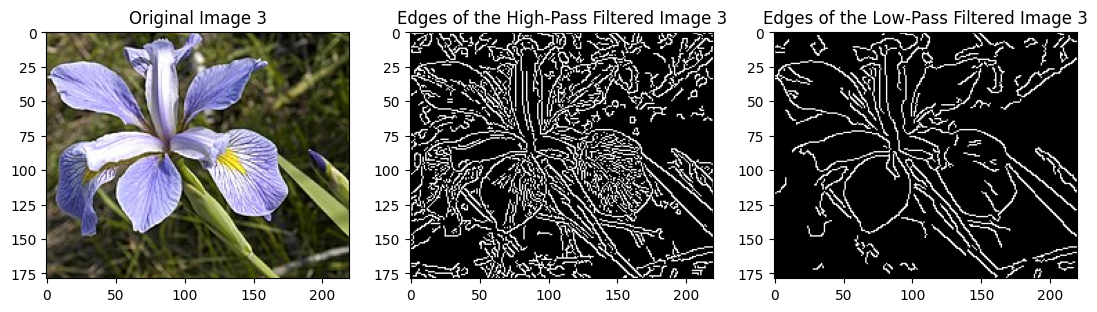

In [6]:
# Load three images
image1 = cv2.imread('iris_1.jpg')
image2 = cv2.imread('iris_2.jpg')
image3 = cv2.imread('iris_3.jpg')

# Convert the images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
gray_image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection to each image
edges1 = cv2.Canny(gray_image1, 100, 200)
edges2 = cv2.Canny(gray_image2, 100, 200)
edges3 = cv2.Canny(gray_image3, 100, 200)

# Low-pass filter (Gaussian blur) kernel size 5x5
low_pass_image1 = cv2.GaussianBlur(gray_image1, (5, 5), 0)
low_pass_image2 = cv2.GaussianBlur(gray_image2, (5, 5), 0)
low_pass_image3 = cv2.GaussianBlur(gray_image3, (5, 5), 0)

# High-pass filter kernel
high_pass_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])

# Apply high-pass filter using convolution
high_pass_image1 = cv2.filter2D(gray_image1, -1, high_pass_kernel)
high_pass_image2 = cv2.filter2D(gray_image2, -1, high_pass_kernel)
high_pass_image3 = cv2.filter2D(gray_image3, -1, high_pass_kernel)

# Apply Canny edge detection to each high-pass filtered image
high_edges1 = cv2.Canny(gray_image1, 100, 200)
high_edges2 = cv2.Canny(gray_image2, 100, 200)
high_edges3 = cv2.Canny(gray_image3, 100, 200)

# Apply Canny edge detection to each low-pass filtered image
low_edges1 = cv2.Canny(low_pass_image1, 100, 200)
low_edges2 = cv2.Canny(low_pass_image2, 100, 200)
low_edges3 = cv2.Canny(low_pass_image3, 100, 200)

# Create a figure to display all images
plt.figure(figsize=(18, 12))
# For image 1: Original, Edges, Low-pass, High-pass
plt.subplot(3, 4, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Original Image 1')

plt.subplot(3, 4, 2)
plt.imshow(high_edges1, cmap='gray')
plt.title('Edges of the High-Pass Filtered Image 1')

plt.subplot(3, 4, 3)
plt.imshow(low_edges1, cmap='gray')
plt.title('Edges of the Low-Pass Filtered Image 1')

# Create a figure to display all images
plt.figure(figsize=(18, 12))
plt.subplot(3, 4, 1)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Original Image 2')

plt.subplot(3, 4, 2)
plt.imshow(high_edges2, cmap='gray')
plt.title('Edges of the High-Pass Filtered Image 2')

plt.subplot(3, 4, 3)
plt.imshow(low_edges2, cmap='gray')
plt.title('Edges of the Low-Pass Filtered Image 2')

# Create a figure to display all images
plt.figure(figsize=(18, 12))
plt.subplot(3, 4, 1)
plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.title('Original Image 3')

plt.subplot(3, 4, 2)
plt.imshow(high_edges3, cmap='gray')
plt.title('Edges of the High-Pass Filtered Image 3')

plt.subplot(3, 4, 3)
plt.imshow(low_edges3, cmap='gray')
plt.title('Edges of the Low-Pass Filtered Image 3')

Let's see what happens when we change the high-pass filter size / weights

Text(0.5, 1.0, 'Filtered Image')

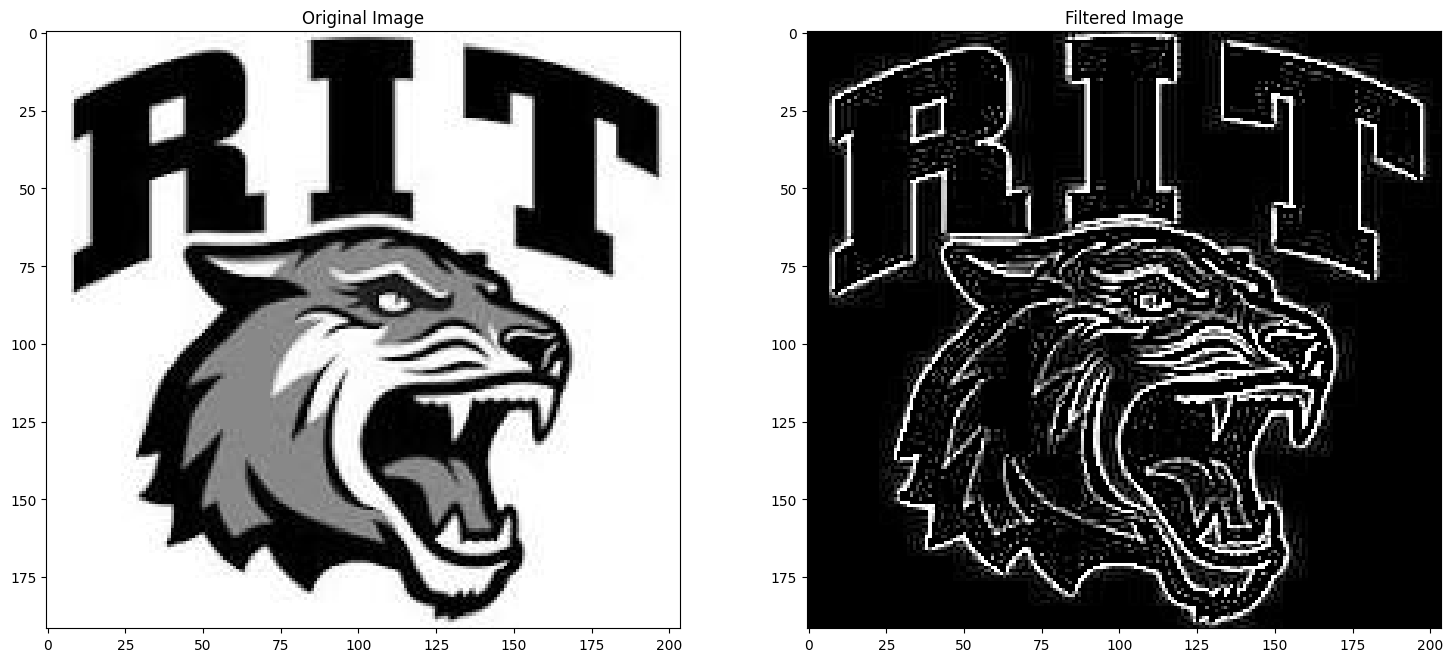

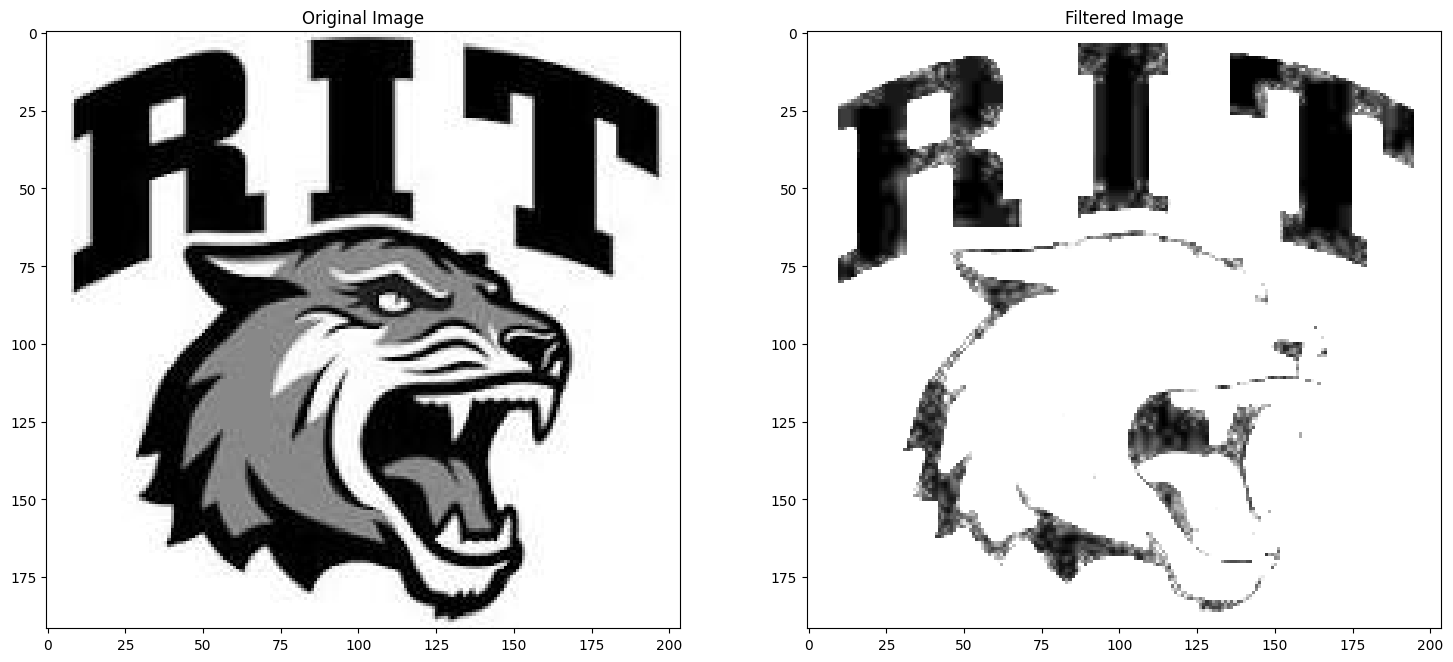

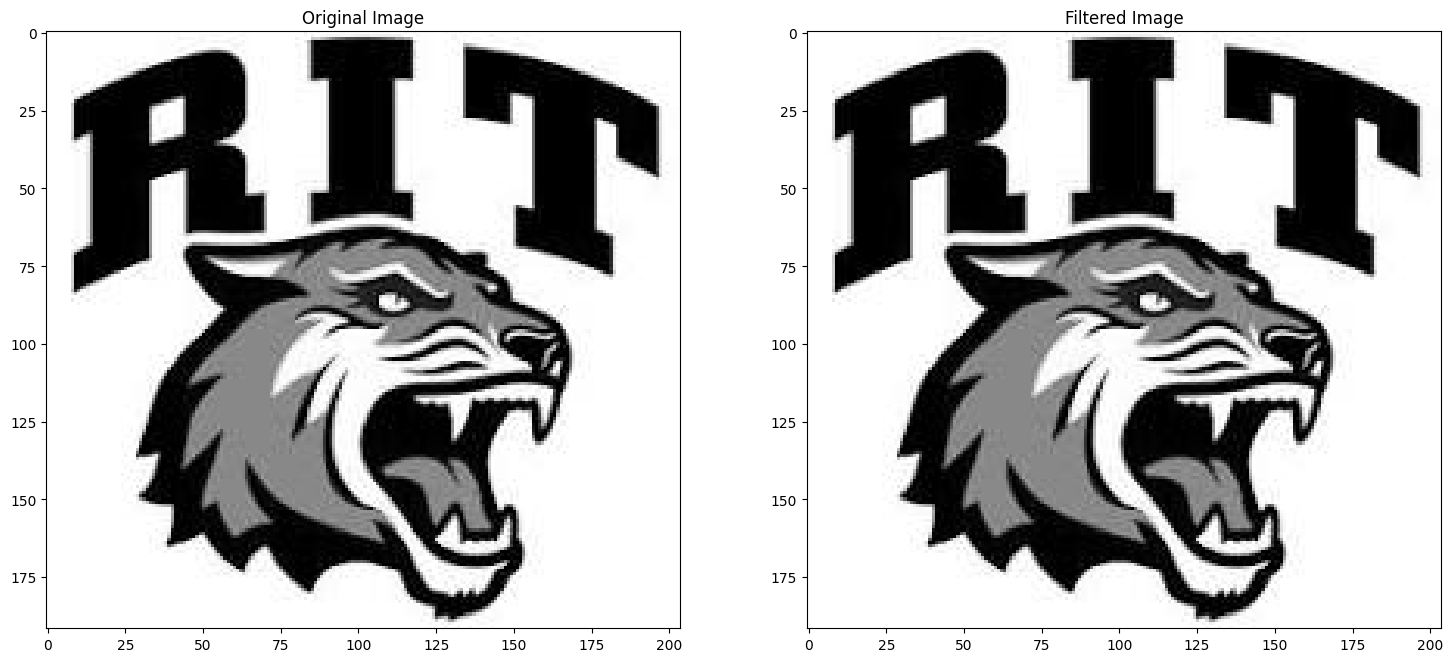

In [7]:
# Load an image
image = cv2.imread('RIT.jpg', cv2.IMREAD_GRAYSCALE)

# High-pass filter kernel
high_pass_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])

# Apply high-pass filter using convolution
high_pass_image1 = cv2.filter2D(image, -1, high_pass_kernel)

# Create a figure to display all images
plt.figure(figsize=(18, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(high_pass_image1, cmap='gray')
plt.title('Filtered Image')

high_pass_kernel = np.array([[2, 2, 2],
                             [2,  8, 2],
                             [2, 2, 2]])

# Apply high-pass filter using convolution
high_pass_image1 = cv2.filter2D(image, -1, high_pass_kernel)

# Create a figure to display all images
plt.figure(figsize=(18, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(high_pass_image1, cmap='gray')
plt.title('Filtered Image')

high_pass_kernel = np.array([[0, 0, 0],
                             [0,  1, 0],
                             [0, 0, 0]])

# Apply high-pass filter using convolution
high_pass_image1 = cv2.filter2D(image, -1, high_pass_kernel)

# Create a figure to display all images
plt.figure(figsize=(18, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(high_pass_image1, cmap='gray')
plt.title('Filtered Image')

Let's see what happens when we change the low-pass filter size / weights

Text(0.5, 1.0, 'Filtered Image')

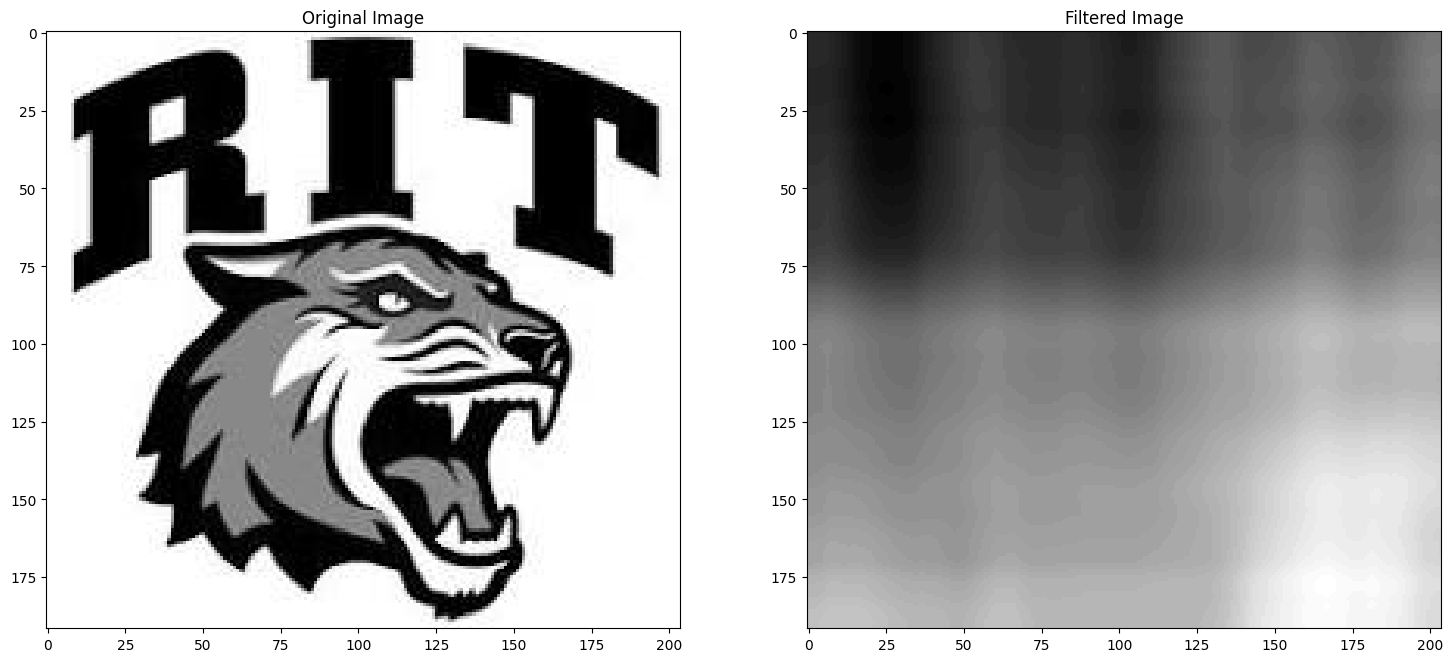

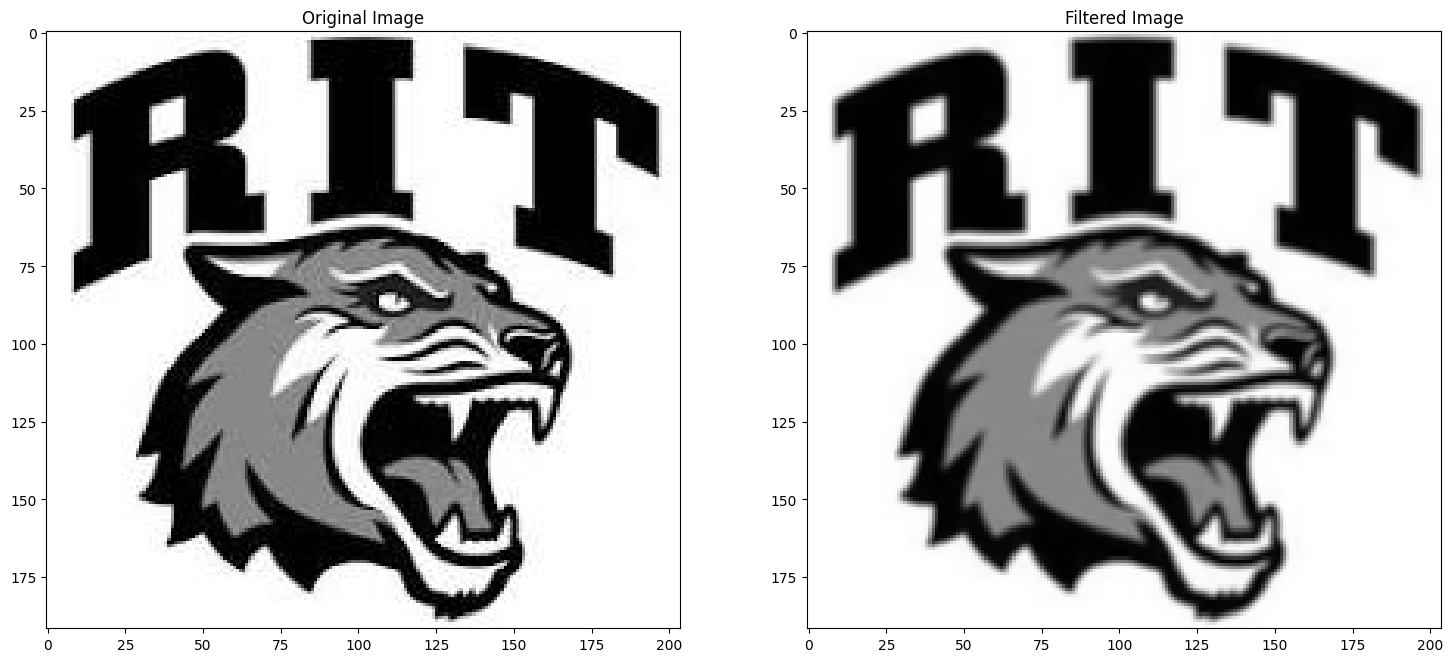

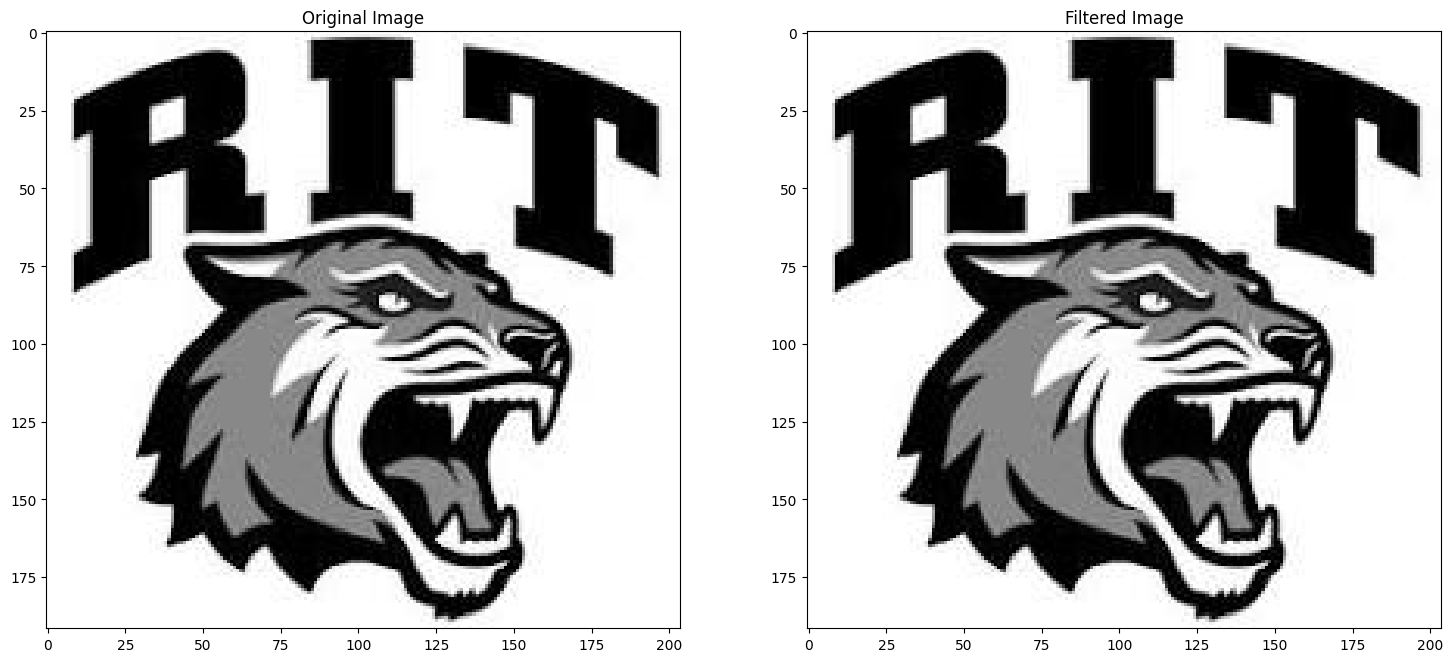

In [15]:
# Let's look at low-pass filteres
# Get the size of the image
image = cv2.imread('RIT.jpg', cv2.IMREAD_GRAYSCALE)
#set the box size
height, width = image.shape[:2]

# Apply a box filter (low-pass filter) with kernel size equal to the image size
# Each pixel is the average of all the pixels
low_pass_image = cv2.blur(image, (width, height))

# Create a figure to display all images
plt.figure(figsize=(18, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(low_pass_image, cmap='gray')
plt.title('Filtered Image')

# Apply a box filter (low-pass filter) with kernel size equal to the image size

low_pass_image = cv2.blur(image, (3, 3))
# Create a figure to display all images
plt.figure(figsize=(18, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(low_pass_image, cmap='gray')
plt.title('Filtered Image')

low_pass_image = cv2.blur(image, (1, 1))
# Create a figure to display all images
plt.figure(figsize=(18, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(low_pass_image, cmap='gray')
plt.title('Filtered Image')

We will rarely use a vanilla low-pass filter. A better version uses the weighted average to calculate pixel values. This is called a Gaussian filter or Gaussian blur.

Text(0.5, 1.0, 'Filtered Image')

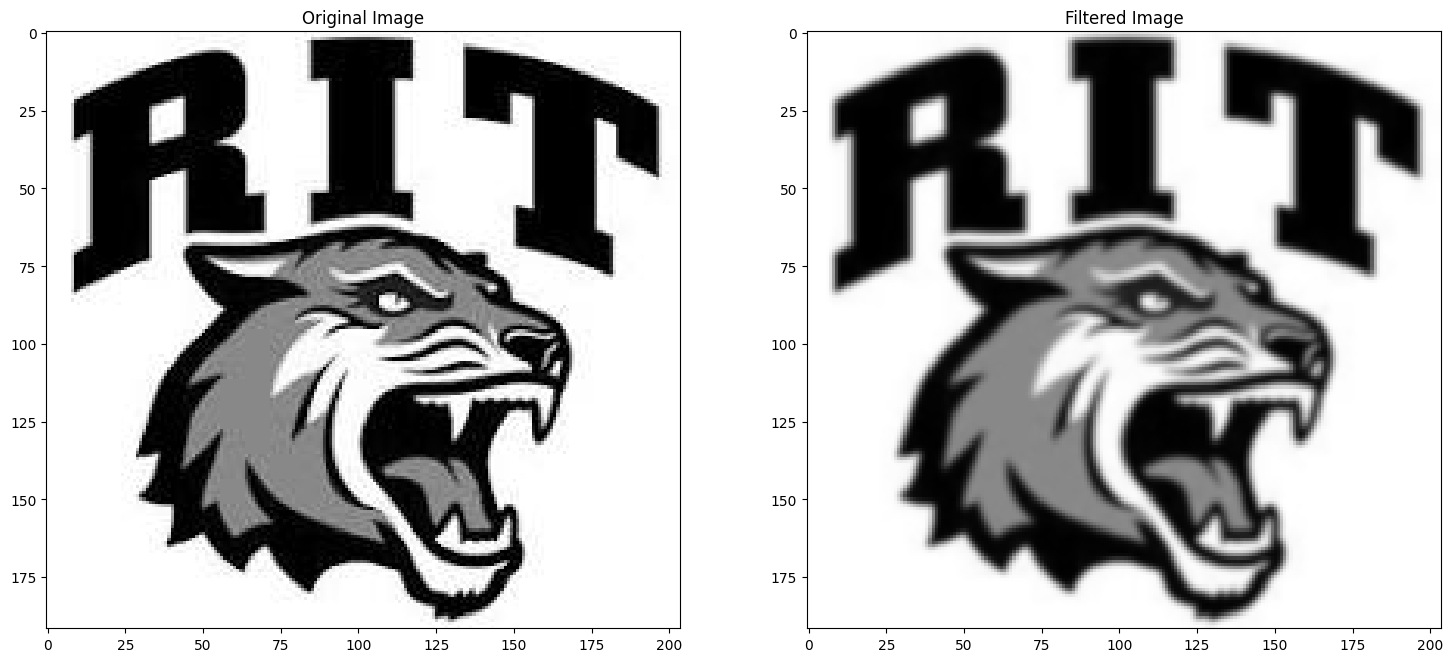

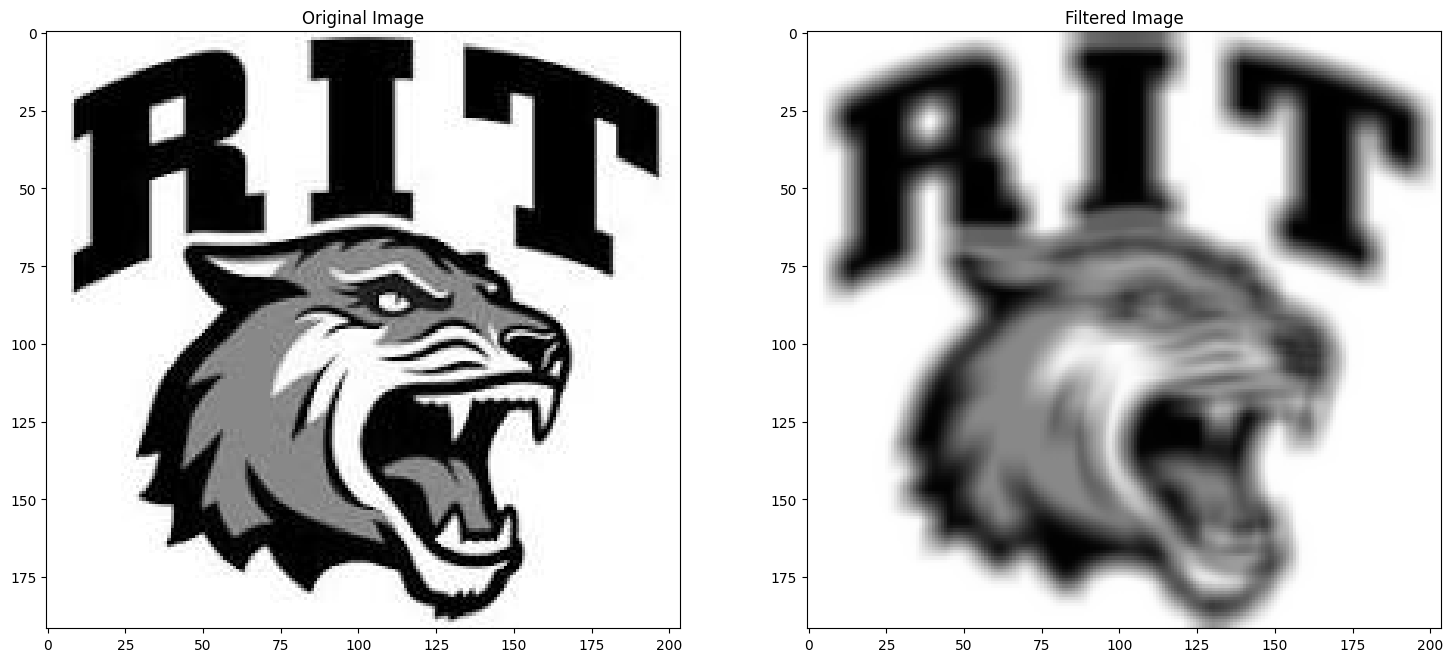

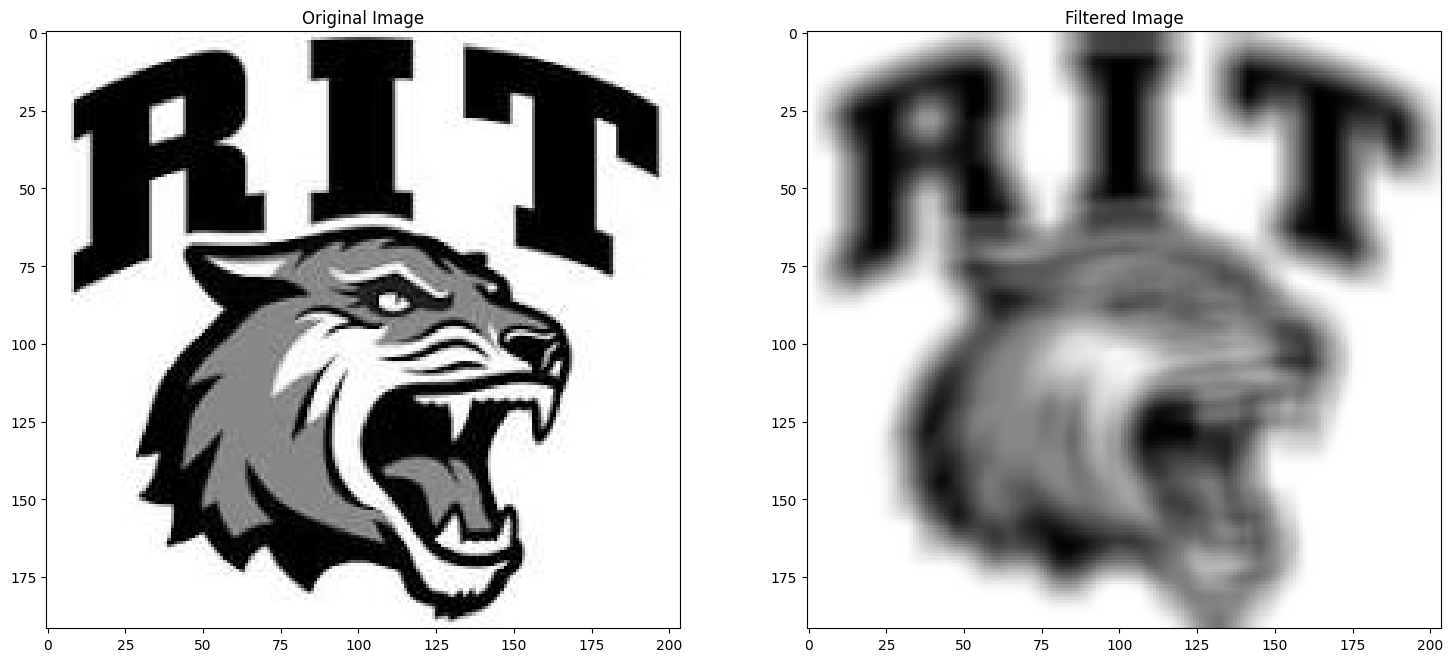

In [14]:
# Let's look at a Gaussian blur filter
# Get the size of the image
image = cv2.imread('RIT.jpg', cv2.IMREAD_GRAYSCALE)

# Low-pass filter (Gaussian blur) kernel size 5x5
low_pass_image = cv2.GaussianBlur(image, (5, 5), 0)

# Create a figure to display all images
plt.figure(figsize=(18, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(low_pass_image, cmap='gray')
plt.title('Filtered Image')

low_pass_image = cv2.blur(image, (10, 10))
# Create a figure to display all images
plt.figure(figsize=(18, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(low_pass_image, cmap='gray')
plt.title('Filtered Image')

low_pass_image = cv2.blur(image, (15, 15))
# Create a figure to display all images
plt.figure(figsize=(18, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(low_pass_image, cmap='gray')
plt.title('Filtered Image')

Unfortunately, opencv does not come with built-in parameters for adjusting the Gaussian filters weights.
We will need to create a custom kernel.

Text(0.5, 1.0, 'Filtered Image')

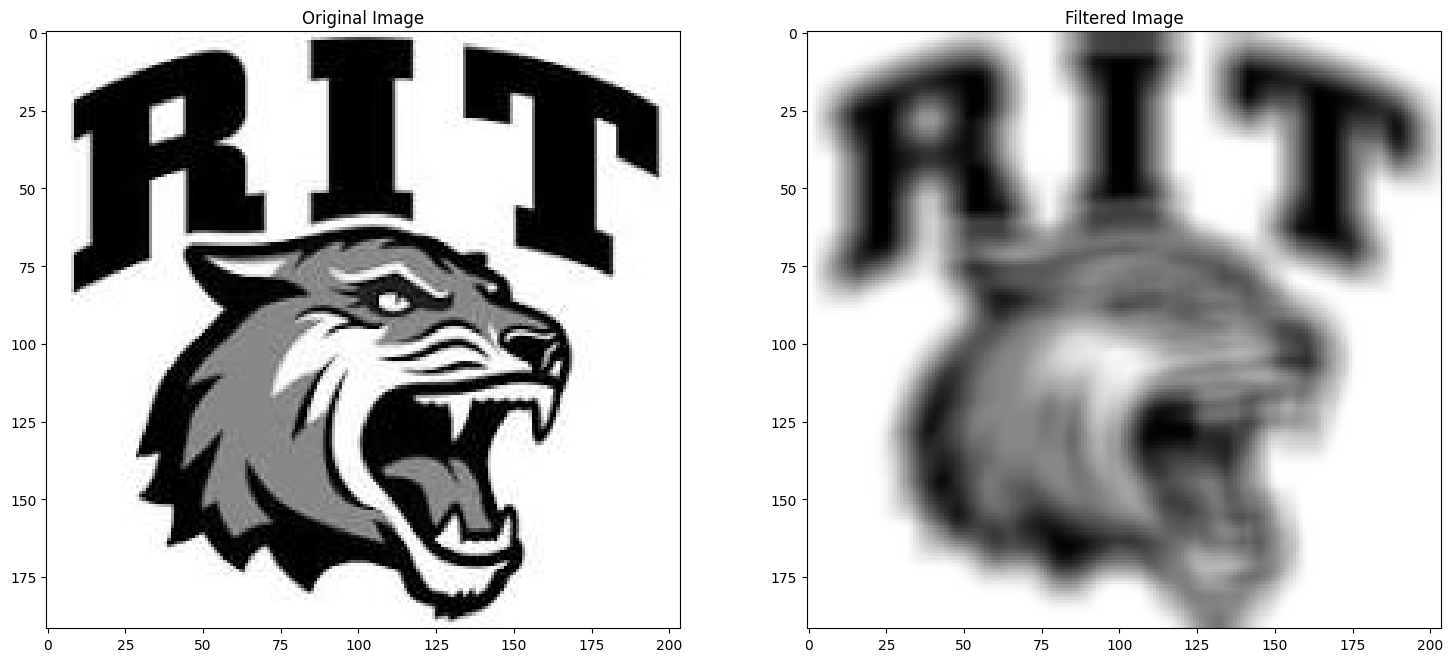

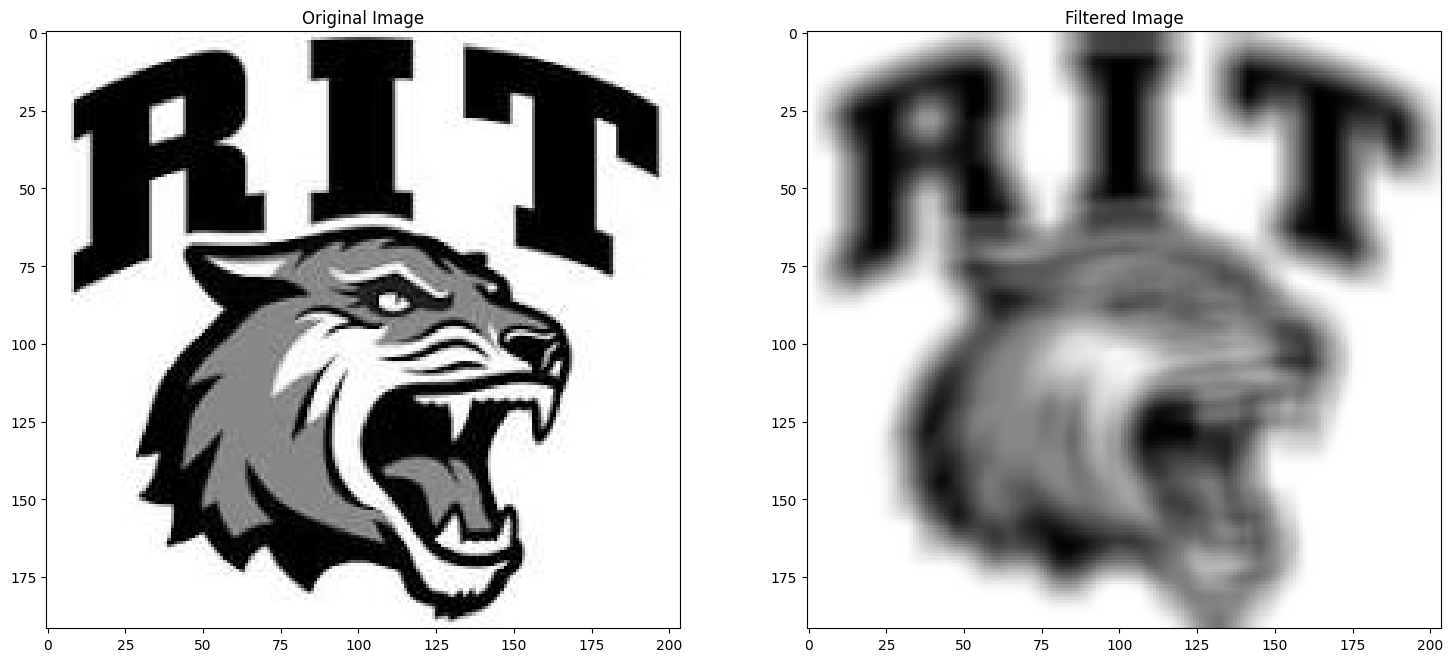

In [11]:
# Load an image
image = cv2.imread('RIT.jpg', cv2.IMREAD_GRAYSCALE)

# Define a custom Gaussian-like kernel with modified weights
custom_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32)

# Normalize the kernel (optional, but recommended to maintain intensity levels)
custom_kernel /= custom_kernel.sum()

# Apply the custom Gaussian kernel using filter2D
custom_blurred_image = cv2.filter2D(image, -1, custom_kernel)

# Create a figure to display all images
plt.figure(figsize=(18, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(low_pass_image, cmap='gray')
plt.title('Filtered Image')

# Define a custom Gaussian-like kernel with modified weights
custom_kernel = np.array([
    [-1, 3, 0],
    [3, 6, 3],
    [1, 0, 4]
], dtype=np.float32)

# Normalize the kernel (optional, but recommended to maintain intensity levels)
custom_kernel /= custom_kernel.sum()

# Apply the custom Gaussian kernel using filter2D
custom_blurred_image = cv2.filter2D(image, -1, custom_kernel)

# Create a figure to display all images
plt.figure(figsize=(18, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(low_pass_image, cmap='gray')
plt.title('Filtered Image')